Alya Sausan Fauziyah - JCDS 0510

# Business Problem Understanding

**Problem Statement**

Perusahaan telekomunikasi menghadapi tantangan besar terkait layanan internetnya, di mana data menunjukkan tingkat churn pelanggan mencapai angka 26.5%. Tingginya angka churn ini dapat mengancam keberlangsungan bisnis, mengakibatkan kerugian signifikan dalam pendapatan.

Jika masalah ini tidak segera diatasi, perusahaan berisiko kehilangan lebih banyak pelanggan, sementara biaya akuisisi pelanggan baru jauh lebih mahal dibandingkan biaya mempertahankan pelanggan yang sudah ada. Menurut laporan dari Harvard Business Review, mempertahankan pelanggan dapat 5-25 kali lebih murah daripada menarik pelanggan baru (HBR, 2014).

source: https://hbr.org/2014/10/the-value-of-keeping-the-right-customers



Oleh karena itu, perusahaan ingin mengembangkan model machine learning yang mampu memprediksi pelanggan yang berpotensi churn. Dengan prediksi ini, perusahaan dapat mengambil langkah preventif untuk mempertahankan pelanggan, seperti memberikan penawaran khusus atau meningkatkan layanan.

**Objectives**

- Mengidentifikasi Karakteristik Pelanggan Churn:
Menggali pola dan karakteristik pelanggan yang berpotensi churn berdasarkan data historis perusahaan.

- Meningkatkan Retensi Pelanggan:
Menggunakan hasil prediksi model untuk menerapkan strategi preventif, seperti penawaran harga diskon dengan kontrak lebih panjang atau peningkatan layanan.

**Key Metrics**

Target Variable:

0: Tidak churn
1: Churn

Evaluation Metrics:

False Positive:
Model salah memprediksi pelanggan churn padahal sebenarnya tidak churn.
Konsekuensi: Biaya pemasaran terbuang untuk memberikan promosi kepada pelanggan yang tidak memerlukan intervensi.

False Negative:
Model salah memprediksi pelanggan tidak churn padahal sebenarnya churn.
Konsekuensi: Kehilangan pelanggan, yang berdampak lebih besar karena biaya akuisisi pelanggan baru lebih mahal dibandingkan mempertahankan pelanggan lama.

Dalam konteks ini, False Negative lebih merugikan perusahaan karena langsung berdampak pada kehilangan pendapatan.

**Quantitative Assumptions**

Berdasarkan studi dari Bain & Company, peningkatan retensi pelanggan sebesar 5% dapat meningkatkan keuntungan hingga 25-95% (Bain & Company).

Estimasi Biaya False Negative:
Kehilangan 1 pelanggan diperkirakan setara dengan kerugian pendapatan bulanan rata-rata pelanggan. Jika rata-rata pendapatan bulanan per pelanggan adalah 50 dollar, maka kehilangan 100 pelanggan berarti kehilangan pendapatan  $5\,000/bulan.

Estimasi Biaya False Positive:
Rata-rata biaya promosi per pelanggan, misalnya 10 dollar. Jika terdapat 100 pelanggan yang salah sasaran, maka kerugian biaya promosi adalah $1,000.

**Business Impact**

Dengan memanfaatkan model prediktif ini, perusahaan dapat:

Mengurangi churn hingga 10-20% melalui strategi preventif berbasis data.
Menghemat biaya operasional pemasaran yang salah sasaran.
Memaksimalkan pendapatan dari pelanggan yang dipertahankan.

# Import Library

In [1]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.10.1
!pip install xgboost
!pip install category_encoders
!pip install imbalanced-learn==0.7.0

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl.metadata (11 kB)
Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [2]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN


from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss

import pickle

# Data Understanding

In [3]:
# import data telco customer churn
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## Data Dictionary

In [4]:
# melihat type data tiap kolom dan jumlah baris
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [5]:
# Membuat dataframe dengan keterangan tiap kolom
data_understanding = pd.DataFrame({
    'Kolom': ['Dependents', 'Tenure', 'OnlineSecurity', 'OnlineBackup',
              'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
              'MonthlyCharges', 'Churn'],
    'Keterangan': ['Apakah pelanggan memiliki tanggungan atau tidak',
                   'Jumlah bulan pelanggan telah bergabung dengan perusahaan',
                   'Apakah pelanggan memiliki keamanan online atau tidak',
                   'Apakah pelanggan memiliki cadangan online atau tidak',
                   'Apakah pelanggan berlangganan layanan internet',
                   'Apakah customer memiliki device protection atau tidak',
                   'Apakah customer memilki tech support atau tidak',
                   'Jenis kontrak berdasarkan durasi',
                   'Apakah customer memiliki paperless billing',
                   'Jumlah biaya layanan per bulan ($)',
                   'Apakah pelanggan berhenti berlangganan atau tidak'],
    'Example Values': ['Yes/No', 'Integer', 'Yes/No', 'Yes/No', 'DSL, Fiber optic, etc.',
                       'Yes/No', 'Yes/No', 'Month-to-month, One year, Two year',
                       'Yes/No', 'Numeric', 'Yes/No']
})

# Menampilkan dataframe ket_kolom
data_understanding

,Kolom,Keterangan,Example Values
0,Dependents,Apakah pelanggan memiliki tanggungan atau tidak,Yes/No
1,Tenure,Jumlah bulan pelanggan telah bergabung dengan ...,Integer
2,OnlineSecurity,Apakah pelanggan memiliki keamanan online atau...,Yes/No
3,OnlineBackup,Apakah pelanggan memiliki cadangan online atau...,Yes/No
4,InternetService,Apakah pelanggan berlangganan layanan internet,"DSL, Fiber optic, etc."
5,DeviceProtection,Apakah customer memiliki device protection ata...,Yes/No
6,TechSupport,Apakah customer memilki tech support atau tidak,Yes/No
7,Contract,Jenis kontrak berdasarkan durasi,"Month-to-month, One year, Two year"
8,PaperlessBilling,Apakah customer memiliki paperless billing,Yes/No
9,MonthlyCharges,Jumlah biaya layanan per bulan ($),Numeric


## Missing Values

In [6]:
# mengecek missing value atau data hilang
print('Jumlah missing value di setiap kolom :')
print(df.isna().sum())
print('\nJumlah missing value dari semua kolom: ', df.isna().sum().sum())

Jumlah missing value di setiap kolom :
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Jumlah missing value dari semua kolom:  0


## Duplicate Data

In [7]:
# mengecek data duplikat
print('Jumlah data duplikat :', df.duplicated().sum())

Jumlah data duplikat : 77


In [8]:
# menghapus data duplikat
df.drop_duplicates(inplace=True)
df.shape

(4853, 11)

In [9]:
# memastikan data duplikat sudah terhapus
df.duplicated().sum()

0

## Numeric Variable

### Descriptive Statistic

In [10]:
df.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


### Data Distribution

Cek distribusi data pada kolom numerik

In [11]:
len(df.select_dtypes(include = 'number').columns)

2

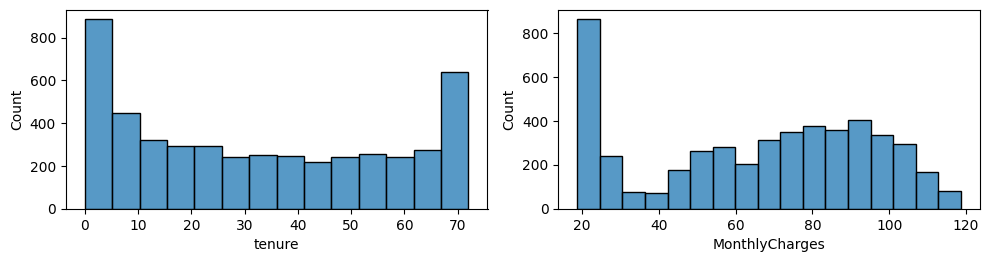

In [12]:
numerik = df.select_dtypes(include = 'number')

# ukuran pigura
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.histplot(df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Distribusi data kolom numerik ternyata berdistribusi tidak normal

### Outliers

Cek outliers pada kolom numerik

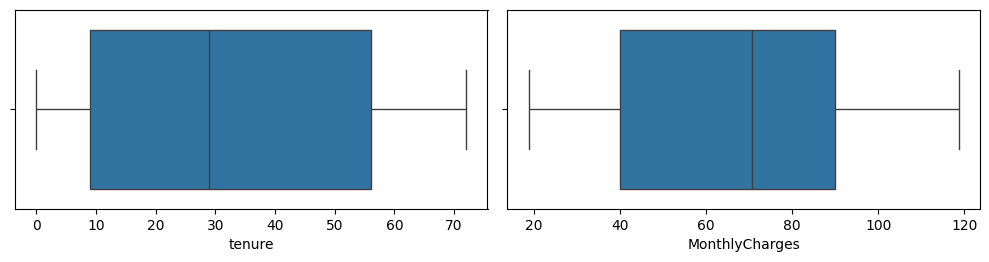

In [13]:
numerik = df.select_dtypes(include = 'number')

# ukuran pigura
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.boxplot(x = df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Tidak ada outliers ditemukan di kolom numerik

### Correlation

<Axes: >

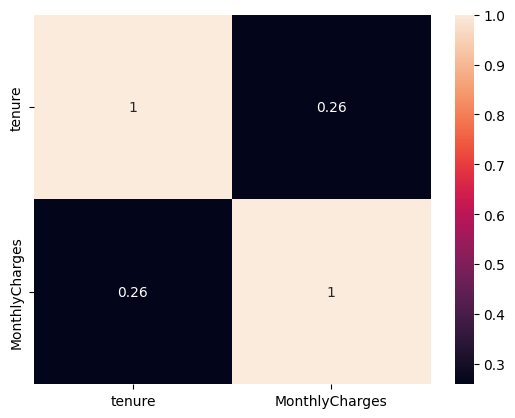

In [14]:
# karena data tidak normal maka digunakan korelasi spearman
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

Fitur 'tenure' dan 'Monthly Charges' memiliki korelasi yang rendah. Meskipun nilai korelasi tidak secara langsung menunjukkan pengaruh antar fitur, korelasi ini dapat digunakan sebagai indikasi awal untuk mendeteksi multikolinieritas. Dengan korelasi yang rendah, kemungkinan besar tingkat multikolinieritas antara kedua fitur ini juga rendah.

### Multicollinearity with VIF

In [15]:
def calc_vif(numerik):
    vif = pd.DataFrame()
    vif['variable'] = numerik.columns
    vif['vif'] = [variance_inflation_factor(numerik.values, i) for i in range(numerik.shape[1])]

    return vif

In [16]:
calc_vif(numerik)

,variable,vif
0,tenure,2.630097
1,MonthlyCharges,2.630097


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('variable').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['vif']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'vif'}, axis=1)
              .sort_values('vif', ascending=True))
  xs = counted['vif']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('vif', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('variable')):
  _plot_series(series, series_name, i)
  fig.legend(title='variable', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('vif')
_ = plt.ylabel('count()')

Variance Inflation Factor (VIF) digunakan untuk mengukur seberapa besar varians koefisien regresi meningkat karena multikolinearitas. Berikut adalah interpretasi umum untuk nilai VIF:

VIF < 1: Tidak ada multikolinearitas.

1 < VIF < 4: Multikolinearitas rendah, model dapat dianggap dapat dipercaya.

VIF ≥ 4: Multikolinearitas tinggi, yang dapat mempengaruhi keandalan model.

Kesimpulan:
Hasil VIF di bawah 4 menunjukkan bahwa multikolinearitas dalam model rendah, dan model tersebut dapat dianggap dapat dipercaya. Namun, nilai VIF yang lebih rendah (misalnya, di bawah 2) lebih diinginkan untuk memastikan bahwa tidak ada masalah multikolinearitas yang signifikan.

## Categoric Variable

### Describe

In [17]:
df.select_dtypes(include='object').describe()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4853,4853,4853,4853,4853,4853,4853,4853,4853
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3380,2420,2148,2154,2162,2442,2665,2925,3565


### Unique Values

In [18]:
kategorik = df.select_dtypes(include = 'object')
kategorik.nunique()

,0
Dependents,2
OnlineSecurity,3
OnlineBackup,3
InternetService,3
DeviceProtection,3
TechSupport,3
Contract,3
PaperlessBilling,2
Churn,2


In [19]:
# Use the unique() method on individual columns within the DataFrame
for col in kategorik.columns:
    display(f"Unique values in column '{col}': {kategorik[col].unique()}")

"Unique values in column 'Dependents': ['Yes' 'No']"

"Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']"

"Unique values in column 'OnlineBackup': ['No' 'Yes' 'No internet service']"

"Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']"

"Unique values in column 'DeviceProtection': ['Yes' 'No internet service' 'No']"

"Unique values in column 'TechSupport': ['Yes' 'No' 'No internet service']"

"Unique values in column 'Contract': ['Month-to-month' 'Two year' 'One year']"

"Unique values in column 'PaperlessBilling': ['Yes' 'No']"

"Unique values in column 'Churn': ['Yes' 'No']"

### Values Count

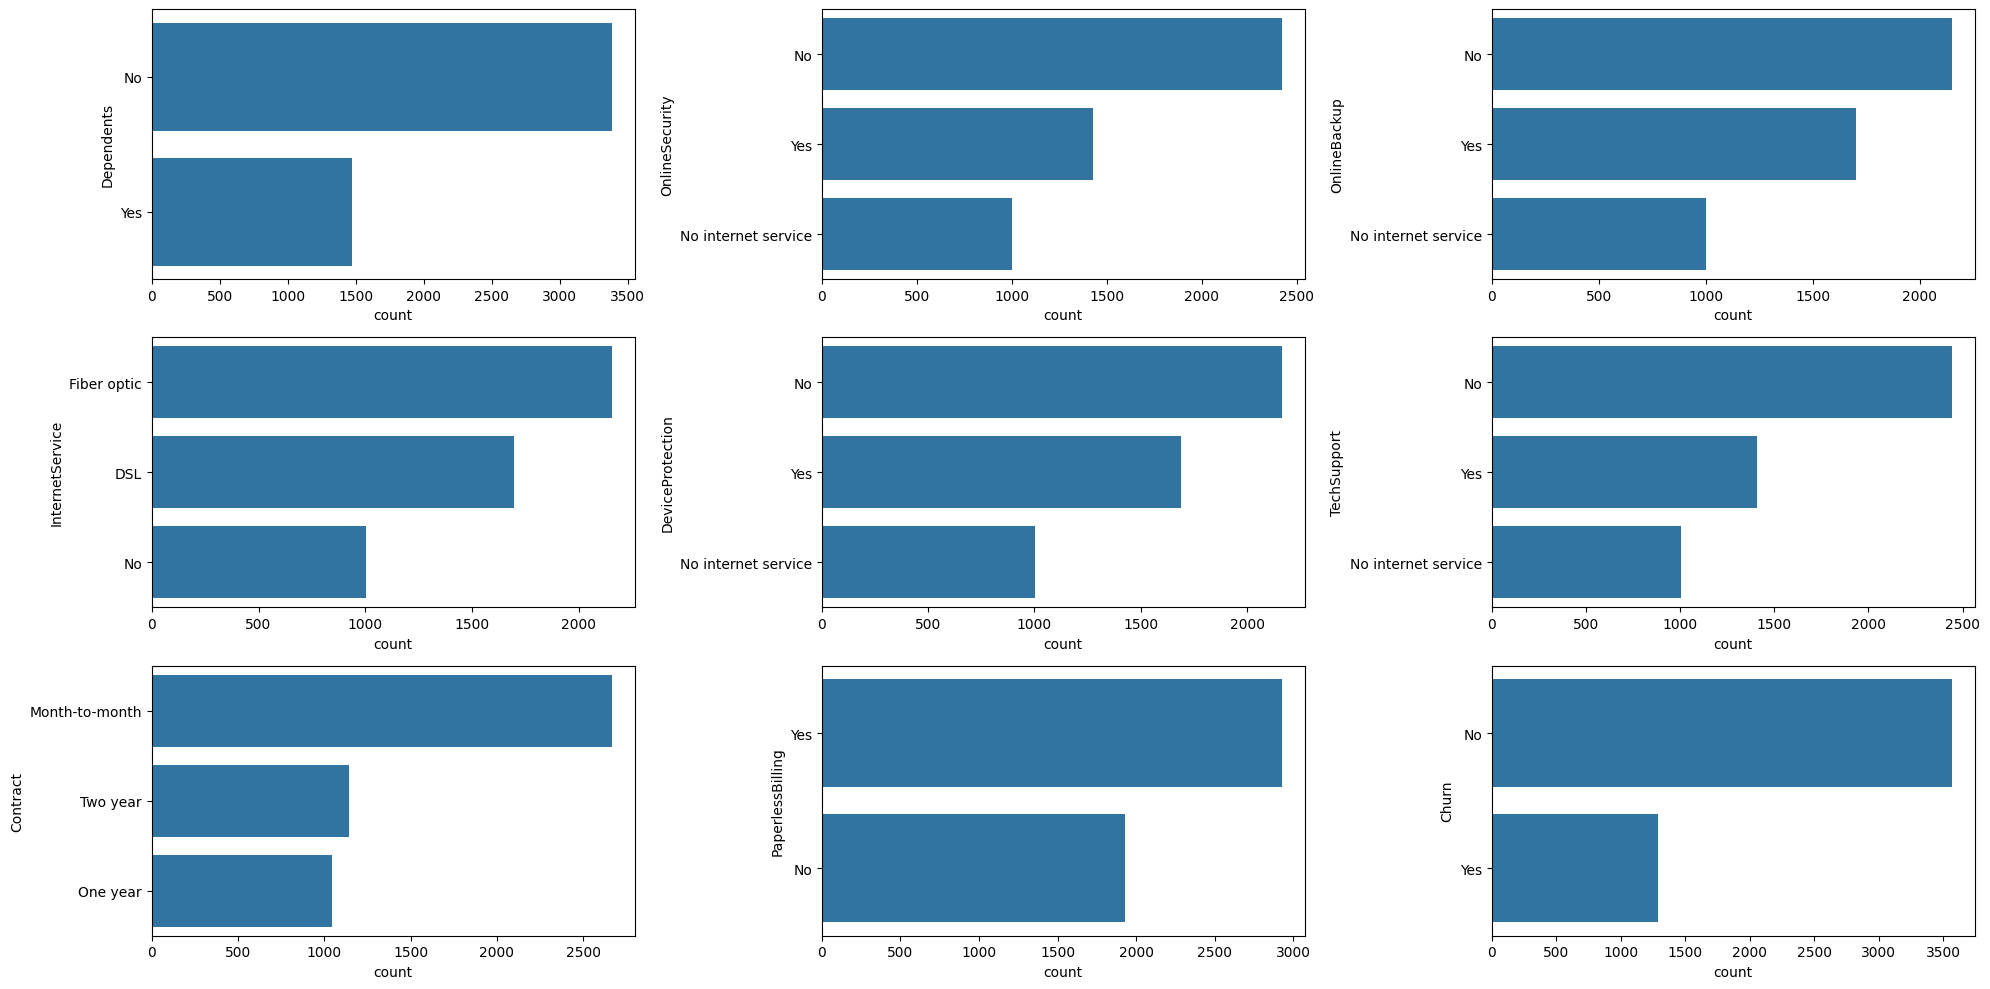

In [20]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (20,10)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in kategorik.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(3,3,posisi)
    sns.barplot(df[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Dari grafik diatas dapat dilihat sebaran data pada kolom kategorik.

Key Takeaways:
- mayoritas pelanggan tidak memiliki tanggungan
- mayoritas pelanggan menggunakan InternetService Fiber Optic
- mayoritas pelanggan berlangganan paket per bulan
- mayoritas pelanggan tidak memiliki OnlineSecurity
- mayoritas pelanggan tidak memiliki DeviceProtection
- mayoritas pelanggan menggunakan PaperlessBilling
- mayoritas pelanggan tidak memiliki OnlineBackup
- mayoritas pelanggan tidak memiliki TechSupport
- mayoritas pelanggan tidak churn

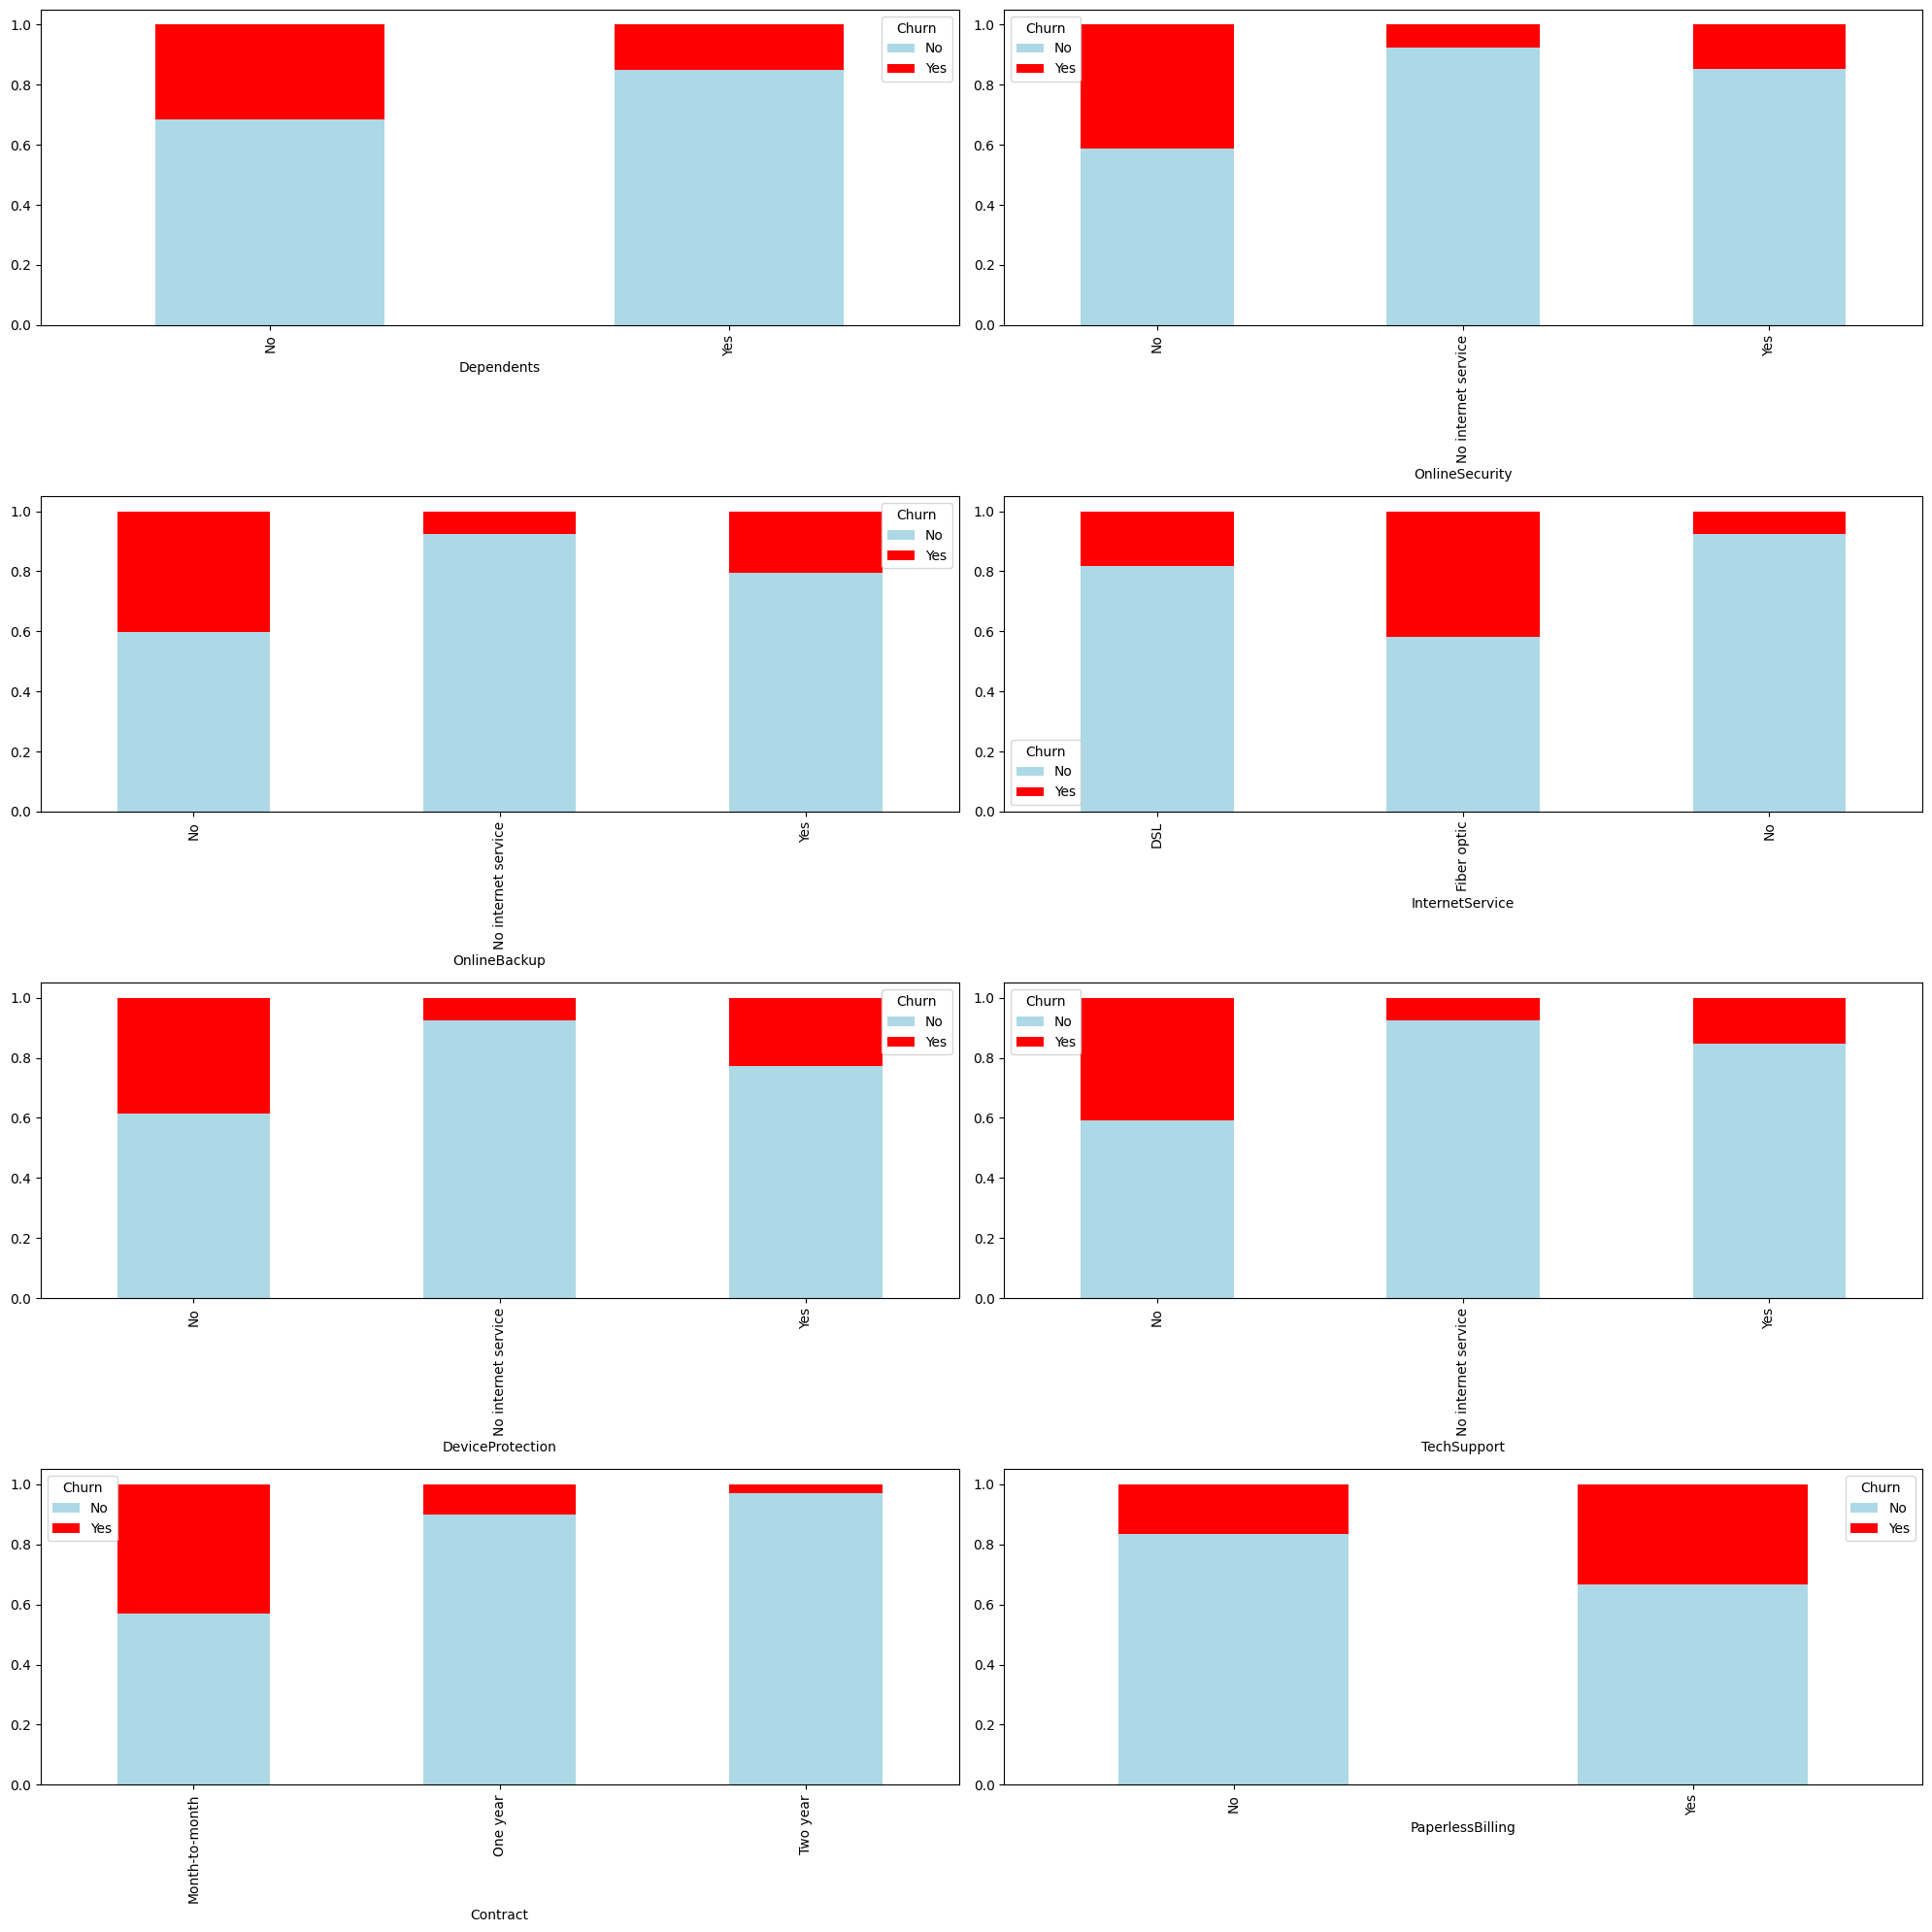

In [21]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Churn', 'tenure', 'MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax, color = ['lightblue', 'red'])
    fig.tight_layout()

plt.show()

Dari grafik diatas dapat dilihat sebaran data customer churn pada kolom kategorik.

Key Takeaways:

- mayoritas pelanggan churn tidak memiliki tanggungan
- mayoritas pelanggan churn berlangganan InternetService Fiber Optic
- mayoritas pelanggan churn berlangganan paket per bulan
- mayoritas pelanggan churn tidak memiliki OnlineSecurity
- mayoritas pelanggan churn tidak memiliki DeviceProtection
- mayoritas pelanggan churn menggunakan PaperlessBilling
- mayoritas pelanggan churn tidak memiliki OnlineBackup
- mayoritas pelanggan churn tidak memiliki TechSupport

# Data Cleaning

In [22]:
# menampilkan unique values dari kolom tenure
df['tenure'].unique()

array([ 9, 14, 64, 72,  3, 40, 17, 11,  8, 47, 18,  5,  1, 48, 13, 58,  7,
        4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56,
       32, 26, 24,  2, 51, 23, 49, 28, 36, 45, 42,  6, 61, 59, 67, 65,  0,
       16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46,
       39, 29, 38, 68, 21])

Kolom tenure berisi data lama pelanggan berlangganan sehingga apabila ada data tenure dengan value 0, ini janggal sehingga perlu di cek lebih lanjut.

In [23]:
# cek baris dengan kolom tenure == 0
df[df['tenure'] == 0]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


Setelah dilihat ternyata kolom tenure == 0 memiliki contract 2 years,mungkin pelanggan baru saja berlangganan dan mengambil paket 2 tahun. Sehingga baris tenure == 0 tetap dipertahankan.

In [24]:
df[df['Contract'] == 'Two year']['tenure'].unique()
# .value_counts().sum()

array([64, 72, 58, 71, 69, 55, 66, 70,  0, 67, 62, 51, 56, 52, 60, 63, 59,
       49, 35, 57, 65, 27, 54, 11, 46, 48, 40, 39, 31, 45, 22, 68, 43, 53,
        8, 14, 24, 30,  6, 47, 41, 61,  4, 19, 26, 33, 16, 44, 23, 18, 17,
       36, 34, 25, 12, 50, 20, 37, 42, 21, 13, 32,  9, 29,  3, 10,  7, 38,
       15,  1])

In [25]:
# menampilkan unique values dari kolom tenure
df['MonthlyCharges'].unique()

array([ 72.9 ,  82.65,  47.85, ...,  58.45,  23.65, 108.5 ])

Tidak ada monthly charges == 0

# EDA

Melihat jumlah customer churn

In [26]:
df['Churn'].value_counts()

,count
Churn,
No,3565
Yes,1288


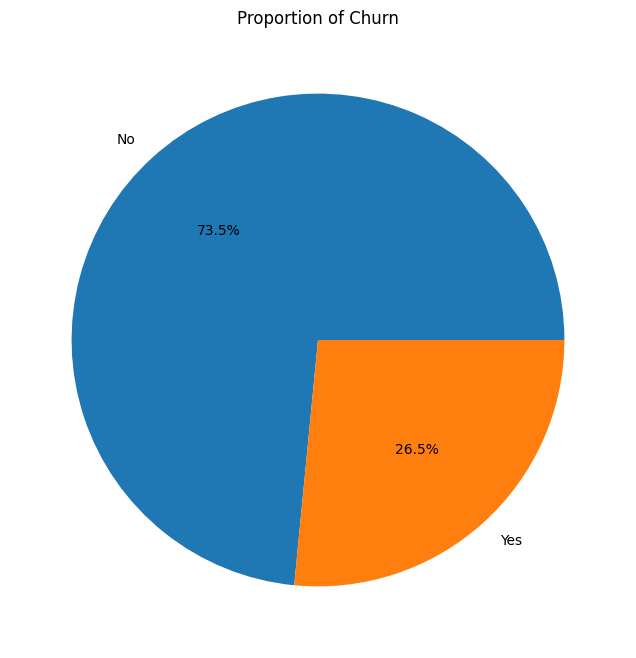

In [27]:
plt.figure(figsize=(8,8))
plt.pie(df['Churn'].value_counts(), labels = df['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Proportion of Churn')
plt.show()

Kolom target 'Churn', Yes: 26.5% dan No: 73.5%

dapat dilihat kolom target 'Churn' terdapat imbalanced sehingga nantinya harus dilakukan resampling

## Numerical Data

In [28]:
print('Total tagihan semua pelanggan : $', (df['MonthlyCharges'].sum()))
print('Rata-rata tagihan pelanggan : $', round(df['MonthlyCharges'].mean(), 2))
print('Total tagihan pelanggan yang Churn : $', round(df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()))
print('Rata-rata tagihan pelanggan yang Churn : $', round(df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(), 2))
print('Proporsi total tagihan pelanggan yang Churn dari seluruh pelanggan :', round((df[df['Churn'] == 'Yes']['MonthlyCharges'].sum())/(df['MonthlyCharges'].sum())*100, 2), '%')

Total tagihan semua pelanggan : $ 317005.45
Rata-rata tagihan pelanggan : $ 65.32
Total tagihan pelanggan yang Churn : $ 96532
Rata-rata tagihan pelanggan yang Churn : $ 74.95
Proporsi total tagihan pelanggan yang Churn dari seluruh pelanggan : 30.45 %


Dari data dapat diketahui bahwa perusahaan telah kehilangan 30.45% pendapatan karena customer churn.

# Data Preparation

## Targetting

In [29]:
# ubah churn menjadi yes =1, no =0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [30]:
# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

## Identify Numerical & Categorical



In [31]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

## Data Splitting

In [32]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3882, 10), (971, 10), (3882,), (971,))

## Transformer Encoding, Scaler, Remainder

In [34]:
transformer = ColumnTransformer([
    ('num', RobustScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical_cols)
], remainder = 'passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', RobustScaler(),
                                 Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])

Penjelasan Kode ColumnTransformer

1. **RobustScaler**
RobustScaler digunakan untuk melakukan normalisasi pada kolom numerik. Alasan menggunakan RobustScaler adalah karena kolom numerik berdistribusi tidak normal dan mungkin memiliki outlier. RobustScaler bekerja dengan cara:
- Menggunakan **median** dan **interquartile range** (IQR) untuk scaling, bukan mean dan standard deviation seperti StandardScaler.
- Ini membuat RobustScaler lebih tahan terhadap outlier, sehingga distribusi data lebih stabil setelah scaling.

2. **OneHotEncoder**
OneHotEncoder digunakan untuk mengubah kolom kategorik menjadi representasi numerik biner.
- Kolom kategorik memiliki **paling banyak 3 unique values**.
- Menggunakan `drop='first'` berarti kita **menghapus salah satu kategori** dari encoding untuk menghindari **dummy variable trap** (kolinearitas antar fitur).
- Misalnya, jika ada kategori ['A', 'B', 'C'], dengan `drop='first'`, kita hanya akan mendapatkan dua kolom biner untuk 'B' dan 'C'. Jika nilai kedua kolom adalah 0, maka secara otomatis kita tahu bahwa kategori adalah 'A'.

3. **Remainder 'passthrough'**
`remainder='passthrough'` berfungsi untuk **meneruskan kolom yang tidak disebutkan dalam `ColumnTransformer`** tanpa perubahan. Ini artinya:
- Kolom yang tidak ada dalam `numerical_cols` atau `categorical_cols` akan tetap dimasukkan ke dalam output pipeline tanpa transformasi.
- Berguna jika ada kolom lain yang ingin tetap dipertahankan dalam bentuk aslinya tanpa modifikasi.

4. **ColumnTransformer**
`ColumnTransformer` digunakan untuk **menerapkan transformasi berbeda pada subset kolom yang berbeda** dalam dataset.
- **'num'**: Mengaplikasikan `RobustScaler` ke kolom numerik (`numerical_cols`).
- **'cat'**: Mengaplikasikan `OneHotEncoder` ke kolom kategorik (`categorical_cols`).
- **Remainder**: Kolom yang tidak ditentukan akan diteruskan tanpa perubahan.
- Dengan ini, kita bisa melakukan **transformasi khusus** pada kolom tertentu dan **menggabungkan semua hasil transformasi** menjadi satu dataset yang siap untuk digunakan dalam model machine learning

# Modelling

## Rule Based Model (Non ML)

In [35]:
# buat rumus rule based
def rule_based(df):
    if (df['tenure']< 12) and df['Contract'] == 'Month-to-month':
        return 1
    else:
        return 0

In [36]:
y_pred_train_rule_based = X_train.apply(rule_based, axis = 1)
score_train_rule_based = f1_score(y_train, y_pred_train_rule_based)

y_pred_test_rule_based = X_test.apply(rule_based, axis = 1)
score_test_rule_based = f1_score(y_test, y_pred_test_rule_based)

In [37]:
df0 = pd.DataFrame({
    'model': ['Rule Based'],
    'train_score_mean': [score_train_rule_based],
    'train_score_std': None,
    'test_score': [score_test_rule_based]})
df0

,model,train_score_mean,train_score_std,test_score
0,Rule Based,0.537645,None,0.498994


Penjelasan Rule Based Model

- **Model Rule Based** adalah pendekatan sederhana yang hanya menggunakan dua fitur untuk membuat aturan keputusan.
- **Akurasi rata-rata pada data training** adalah sekitar **53.76%**.
- **Akurasi pada data testing** menunjukkan nilai **49.89%**, sedikit lebih rendah daripada akurasi training.
- Pendekatan rule-based ini memberikan baseline akurasi yang dapat dibandingkan dengan model machine learning yang akan dibuat selanjutnya.

Meskipun model rule-based sederhana ini memiliki akurasi mendekati 50%, model machine learning yang lebih kompleks diharapkan mampu memberikan kinerja yang lebih baik.


## Experiment 1: Based Model

In [38]:
# base model
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

# voting
vc_hard = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'hard')
vc_soft = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'soft')

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
meta_model = LogisticRegression()
stacking = StackingClassifier(base_model,meta_model)

# bagging
rf = RandomForestClassifier(random_state=0)

# boosting
gb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

In [39]:
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'K-Nearest Neighbors': knn,
    'Voting Classifier (Hard)': vc_hard,
    'Voting Classifier (Soft)': vc_soft,
    'Stacking': stacking,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb
}

results = [ ]
for model_name, model in models.items():
        print(f'model: {model_name} processing...')
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('transformer', transformer),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
        recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Mean F1 Score': np.mean(f1_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F1 Score': np.std(f1_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })

pd.DataFrame(results)

model: Logistic Regression processing...
model: Decision Tree processing...
model: K-Nearest Neighbors processing...
model: Voting Classifier (Hard) processing...
model: Voting Classifier (Soft) processing...
model: Stacking processing...
model: Random Forest processing...
model: Gradient Boosting processing...
model: XGBoost processing...


,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,Logistic Regression,0.573032,0.521359,0.637047,0.013743,0.009004,0.032051
1,Decision Tree,0.488219,0.491262,0.485434,0.029402,0.025577,0.034233
2,K-Nearest Neighbors,0.525595,0.488350,0.569672,0.027836,0.035883,0.017665
3,Voting Classifier (Hard),0.549159,0.502913,0.605399,0.020930,0.024676,0.022484
4,Voting Classifier (Soft),0.526079,0.494175,0.562828,0.026829,0.021796,0.036433
5,Stacking,0.571642,0.506796,0.656486,0.018761,0.014269,0.036388
6,Random Forest,0.505914,0.448544,0.581541,0.018352,0.027219,0.015858
7,Gradient Boosting,0.558370,0.496117,0.639939,0.027402,0.029352,0.037383
8,XGBoost,0.532739,0.493204,0.579363,0.024278,0.023900,0.026587


In [40]:
# print 3 base model terbaik
print('3 Base Model Terbaik')
pd.DataFrame(results).sort_values(by='Mean Recall', ascending=False).head(3)

3 Base Model Terbaik


,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,Logistic Regression,0.573032,0.521359,0.637047,0.013743,0.009004,0.032051
5,Stacking,0.571642,0.506796,0.656486,0.018761,0.014269,0.036388
3,Voting Classifier (Hard),0.549159,0.502913,0.605399,0.020930,0.024676,0.022484


Penjelasan:
1. **F1 Score** digunakan sebagai metrik utama karena dataset masih tidak seimbang (imbalance). F1 Score adalah metrik yang menggabungkan Precision dan Recall, sehingga memberikan gambaran yang lebih baik tentang performa model.
2. **Recall** juga menjadi pertimbangan penting karena fokus pada model ini adalah menekan **False Negative** (FN). False Negative memiliki dampak yang lebih besar dalam konteks churn, karena pelanggan yang churn namun tidak terdeteksi akan meningkatkan kerugian.

Model Terbaik Berdasarkan F1 Score:
- **Logistic Regression (F1 Score: 0.5730):** Model ini memiliki skor F1 tertinggi, dengan recall yang cukup baik (0.5214) dan precision yang juga tinggi (0.6370).
- **Stacking (F1 Score: 0.5716):** Model ini mendekati Logistic Regression dalam F1 Score dan memiliki precision tertinggi (0.6565), namun recall-nya sedikit lebih rendah (0.5068).
- **Gradient Boosting (F1 Score: 0.5584):** Model ini memiliki F1 Score yang kompetitif dengan recall yang cukup baik (0.4961) dan precision (0.6399).

Tindak Lanjut:
- **Logistic Regression**, **Stacking**, dan **Gradient Boosting** dipilih sebagai 3 model terbaik berdasarkan F1 Score.
- Selanjutnya, fokus pada **Recall** untuk membandingkan performa model dalam menekan False Negative.
- Model yang terpilih akan dilakukan resampling guna meningkatkan performa.

Logistic Regression memberikan hasil yang paling seimbang, namun Stacking dan Gradient Boosting juga merupakan pilihan yang baik untuk mempertimbangkan trade-off antara Precision dan Recall.


## Experiment 2: 3 Best Model + Resampling

In [41]:
# contoh hasil resampler pada semua undersampler
rus = RandomUnderSampler(random_state=42)
cnn = CondensedNearestNeighbour()
ncr = NeighbourhoodCleaningRule()
nm1 = NearMiss(version= 1)
nm2 = NearMiss(version= 2)
nm3 = NearMiss(version= 3)

# definisikan setiap metode
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
adasyn = ADASYN(random_state = 42)
smt = SMOTETomek(random_state = 42)
sme = SMOTEENN(random_state = 42)

In [42]:
# Define the models
models = {
    'Logistic Regression': lr, # GANTI SESUAIKAN DENGAN PUNYA SENDIRI
    # 'Voting Classifier (Hard)': vc_hard,
    'Stacking': stacking,
    'Gradient Boosting': gb
}

# Define the resampling methods
resampling_methods = {
    'Random Under Sampler': RandomUnderSampler(random_state=42),
    # 'Condensed Nearest Neighbour': CondensedNearestNeighbour(),
    'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
    'NearMiss 1': NearMiss(version=1),
    'NearMiss 2': NearMiss(version=2),
    'NearMiss 3': NearMiss(version=3),
    'Random Over Sampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SMOTE Tomek': SMOTETomek(random_state=42),
    'SMOTE ENN': SMOTEENN(random_state=42)
}
# Prepare a DataFrame to store results
results_resampling = []

# Loop through each model and resampling method
for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    # Loop through each resampling method
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('transformer', transformer),
              ('resampling', resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
        recall_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='precision')

        # Store the results
        results_resampling.append({
            'Model': model_name,
            'Resampling Method': resampling_name,
            'Mean F1 Score': np.mean(f1_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F1 Score': np.std(f1_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })

# # Create a DataFrame from the results
# results_resampling_df = pd.DataFrame(results_resampling)
# results_resampling_df

# Create a DataFrame from the results
results_resampling_df = pd.DataFrame(results_resampling) # changed from result to results_resampling
results_resampling_df

Model: Logistic Regression processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: NearMiss 1 processing...
	Resampling: NearMiss 2 processing...
	Resampling: NearMiss 3 processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
	Resampling: SMOTE Tomek processing...
	Resampling: SMOTE ENN processing...
Model: Stacking processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: NearMiss 1 processing...
	Resampling: NearMiss 2 processing...
	Resampling: NearMiss 3 processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
	Resampling: SMOTE Tomek processing...
	Resampling: SMOTE ENN processing...
Model: Gradient Boosting processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood C

,Model,Resampling Method,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,Logistic Regression,Random Under Sampler,0.617764,0.788761,0.508043,0.015600,0.034893,0.010638
1,Logistic Regression,Neighbourhood Cleaning Rule,0.623533,0.794215,0.513526,0.012852,0.025959,0.012290
2,Logistic Regression,NearMiss 1,0.514524,0.700323,0.407097,0.016743,0.024959,0.018357
3,Logistic Regression,NearMiss 2,0.451737,0.740687,0.325008,0.009067,0.015726,0.007380
4,Logistic Regression,NearMiss 3,0.609476,0.669228,0.559865,0.012990,0.024337,0.010703
5,Logistic Regression,Random Over Sampler,0.622710,0.798094,0.510806,0.012695,0.028836,0.010208
6,Logistic Regression,SMOTE,0.621440,0.791883,0.511580,0.012293,0.026407,0.009147
7,Logistic Regression,ADASYN,0.617238,0.831490,0.490865,0.011277,0.020902,0.008871
8,Logistic Regression,SMOTE Tomek,0.621193,0.794212,0.510283,0.011544,0.025760,0.008671
9,Logistic Regression,SMOTE ENN,0.616244,0.815178,0.495580,0.013815,0.022106,0.014135


In [43]:
#hasil results_df 5 terbaik berdasarkan mean recall
results_resampling_df = results_resampling_df.sort_values(by='Mean Recall', ascending=False).head(5)
results_resampling_df

,Model,Resampling Method,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
7,Logistic Regression,ADASYN,0.617238,0.831490,0.490865,0.011277,0.020902,0.008871
9,Logistic Regression,SMOTE ENN,0.616244,0.815178,0.495580,0.013815,0.022106,0.014135
5,Logistic Regression,Random Over Sampler,0.622710,0.798094,0.510806,0.012695,0.028836,0.010208
1,Logistic Regression,Neighbourhood Cleaning Rule,0.623533,0.794215,0.513526,0.012852,0.025959,0.012290
21,Gradient Boosting,Neighbourhood Cleaning Rule,0.624598,0.794215,0.514951,0.007803,0.025272,0.005277


In [44]:
# print best model dari results_df berdasarkan mean recall
print('5 Hasil Resampling Terbaik')
results_resampling_df.sort_values(by='Mean Recall', ascending=False).head(5)

5 Hasil Resampling Terbaik


,Model,Resampling Method,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
7,Logistic Regression,ADASYN,0.617238,0.831490,0.490865,0.011277,0.020902,0.008871
9,Logistic Regression,SMOTE ENN,0.616244,0.815178,0.495580,0.013815,0.022106,0.014135
5,Logistic Regression,Random Over Sampler,0.622710,0.798094,0.510806,0.012695,0.028836,0.010208
1,Logistic Regression,Neighbourhood Cleaning Rule,0.623533,0.794215,0.513526,0.012852,0.025959,0.012290
21,Gradient Boosting,Neighbourhood Cleaning Rule,0.624598,0.794215,0.514951,0.007803,0.025272,0.005277


In [45]:
# prompt: tolong buatkan dataframe dengan nama lr_before_tuning yang berisi baris pertama dari results_df  dan nama modelnya  diubah menjadi Logistic Regression ADASYN Before Tuning

resampling_selected = results_resampling_df.iloc[[0]].copy()
resampling_selected['Model'] = 'Logistic Regression ADASYN'
resampling_selected

# hapus kolom resampling method
resampling_selected.drop(columns=['Resampling Method'], inplace=True)
resampling_selected

,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
7,Logistic Regression ADASYN,0.617238,0.83149,0.490865,0.011277,0.020902,0.008871


Penjelasan:
1. **ADASYN pada Logistic Regression**:
   - **Mean Recall tertinggi (0.831490)**: Metode ini memberikan performa recall terbaik, yang menjadi prioritas utama karena fokusnya adalah menekan False Negative.
   - **Mean F1 Score (0.617238)**: Walaupun bukan F1 Score tertinggi, nilai ini tetap kompetitif.
   - **Mean Precision (0.490865)**: Precision sedikit lebih rendah, tetapi trade-off ini dapat diterima karena tujuan utama adalah meningkatkan Recall.

2. **Gradient Boosting dengan Neighbourhood Cleaning Rule**:
   - **Mean F1 Score tertinggi (0.624598)**: Gradient Boosting memberikan nilai F1 Score terbaik.
   - **Mean Recall (0.794215)**: Meskipun lebih rendah dibandingkan Logistic Regression dengan ADASYN, nilai ini tetap cukup baik.
   - **Mean Precision (0.514951)**: Precision tertinggi di antara semua model, menunjukkan kemampuan model untuk lebih akurat dalam prediksi positif.

3. **Neighbourhood Cleaning Rule pada Logistic Regression**:
   - Memberikan F1 Score yang tinggi (0.623533) dengan Recall (0.794215) dan Precision (0.513526) yang seimbang.

Tindak Lanjut:
- **Logistic Regression dengan ADASYN** dipilih sebagai model terbaik karena memiliki **Mean Recall tertinggi (0.831490)**. Model ini paling efektif dalam menekan False Negative, yang merupakan prioritas utama dalam analisis ini.
- Gradient Boosting dengan Neighbourhood Cleaning Rule juga dapat dipertimbangkan jika diperlukan model dengan F1 Score lebih tinggi, meskipun Recall lebih rendah.

## Final Model

In [46]:
best_model = Pipeline([
    ('transformer', transformer),
    ('balencing', ADASYN()),
    ('model', lr)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])),
                ('balencing', ADASYN()),
                ('model', LogisticRegression(max_iter=1000))])

In [47]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'F1 Score: {f1_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.92      0.68      0.79       713
           1       0.49      0.84      0.62       258

    accuracy                           0.73       971
   macro avg       0.71      0.76      0.70       971
weighted avg       0.81      0.73      0.74       971

F1 Score: 0.6219686162624821


Model Terbaik: Logistic Regression dengan Resampling ADASYN

Model terbaik yang dipilih adalah Logistic Regression dengan teknik resampling **ADASYN (Adaptive Synthetic Sampling)**. Berikut adalah cara kerja model ini dan alasan mengapa cocok untuk dataset `data_telco_customer_churn`.

---

Cara Kerja Model Logistic Regression dengan ADASYN
1. **Logistic Regression**:
   - Logistic Regression adalah model statistik yang digunakan untuk klasifikasi biner. Model ini memprediksi probabilitas suatu sampel termasuk ke dalam kelas positif atau negatif berdasarkan fungsi logit.
   - Fungsi logit memodelkan hubungan linier antara variabel independen (fitur) dan log odds dari kelas target.

2. **ADASYN (Adaptive Synthetic Sampling)**:
   - ADASYN adalah teknik oversampling untuk menangani masalah **class imbalance**. Pada dataset churn, jumlah pelanggan yang churn (kelas positif) jauh lebih sedikit dibandingkan dengan pelanggan yang tidak churn (kelas negatif).
   - ADASYN bekerja dengan membuat sampel sintetis secara adaptif berdasarkan distribusi data. Area dengan minoritas yang lebih kompleks (misalnya, dekat dengan batas keputusan) akan menghasilkan lebih banyak sampel sintetis.
   - Dengan cara ini, model lebih mampu mengenali pola dalam kelas minoritas, sehingga meningkatkan metrik seperti recall.

- **Recall Class 1 (0.84)**: Model berhasil menangkap 84% pelanggan yang churn, yang menjadi prioritas utama dalam kasus ini.
- **Precision Class 1 (0.49)**: Precision pada kelas churn lebih rendah karena beberapa prediksi churn ternyata salah (False Positive).
- **F1-Score Class 1 (0.62)**: Kombinasi balance antara recall dan precision pada kelas churn.

---

Mengapa Model Ini Cocok untuk Dataset `data_telco_customer_churn`?
1. **Mengatasi Class Imbalance**:
   - Dataset churn biasanya memiliki ketidakseimbangan kelas yang signifikan (lebih banyak pelanggan tidak churn dibandingkan yang churn).
   - Teknik ADASYN memastikan bahwa Logistic Regression dapat belajar pola yang baik pada kelas minoritas (churn).

2. **Interpretabilitas Logistic Regression**:
   - Logistic Regression mudah diinterpretasikan karena memberikan koefisien yang dapat membantu memahami pengaruh setiap fitur terhadap churn.
   - Fitur seperti `Contract`, `MonthlyCharges`, dan `Tenure` memiliki hubungan langsung dengan perilaku pelanggan.

3. **Hasil Evaluasi yang Memadai**:
   - Model menunjukkan **recall tinggi** pada kelas churn (0.84), yang berarti sebagian besar pelanggan yang churn berhasil terdeteksi.
   - **Akurasi keseluruhan 73%** cukup memadai untuk aplikasi bisnis, mengingat fokus utama adalah recall.

4. **Efisiensi Model**:
   - Logistic Regression memiliki waktu pelatihan yang cepat dan performa yang stabil, bahkan untuk dataset dengan dimensi kecil hingga menengah seperti `data_telco_customer_churn`.

---

Kesimpulan
Logistic Regression dengan ADASYN dipilih sebagai model terbaik karena dapat mengatasi masalah class imbalance dan memberikan hasil yang memadai untuk metrik recall, yang menjadi prioritas utama dalam analisis churn. Model ini juga memberikan keseimbangan yang baik antara interpretabilitas dan performa, menjadikannya solusi yang ideal untuk kasus ini.

Tindak Lanjut
Untuk meningkatkan Mean Recall, akan dicoba melakukan Hyperparameter Tuning



# Hyperparameter Tuning

Yang dilakukan hyperparameter tuning adalah SATU MODEL TERBAIK dari hasil eksperimen yang dilakukan

Jangan lupa pemilihan hyperparameter dalam tuning harus dijelaskan!

Lalu setelah di hyperparameter tuning, bandingkan dengan best_model sebelum di tuning. Lihat apakah hyperparameter tuning dapat meningkatkan performa model atau tidak. Jika iya, maka gunakan hasil dari tuning, jika tidak maka tetap gunakan best_model sebelum tuning

POV Recall meningkat dari 75.00% sebelum tuning menjadi 89.44% setelah tuning. Ini berarti model setelah tuning lebih efektif dalam mengidentifikasi hampir semua pelanggan yang akan churn, yang penting untuk strategi retensi pelanggan. Meskipun ada trade-off dalam akurasi dan precision, peningkatan recall menunjukkan bahwa model setelah tuning lebih baik dalam menangkap semua kasus churn yang mungkin terjadi.

In [48]:
# Buat pipeline dengan ADASYN dan LogisticRegression
pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', ADASYN()),
    ('model', lr)
])

# Mendefinisikan Hyperparameter Space untuk LogisticRegression
hyperparam_space = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'saga'],
}

# Definisikan Grid Search
gscv = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

# Fit the Grid Search
gscv.fit(X_train, y_train)

# 1. Fit model pipeline to best parameters:
best_model = gscv.best_estimator_  # Get the best model from GridSearchCV

# 2. Perform cross-validation:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1')
recall_scores = cross_val_score(best_model, X, y, cv=cv, scoring='recall')
precision_scores = cross_val_score(best_model, X, y, cv=cv, scoring='precision')

# 3. Create DataFrame for hypertuning results:
hypertun_result = pd.DataFrame([{
    'Model': 'Logistic Regression ADASYN After Tuning',
    'Mean F1 Score': np.mean(f1_scores),
    'Mean Recall': np.mean(recall_scores),
    'Mean Precision': np.mean(precision_scores),
    'Std F1 Score': np.std(f1_scores),
    'Std Recall': np.std(recall_scores),
    'Std Precision': np.std(precision_scores)
}])

# 4. Combine DataFrames for comparison:
comparison_hypertun = pd.concat([resampling_selected, hypertun_result], ignore_index=True)
display(comparison_hypertun)

,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,Logistic Regression ADASYN,0.617238,0.831490,0.490865,0.011277,0.020902,0.008871
1,Logistic Regression ADASYN After Tuning,0.613480,0.833044,0.487145,0.009696,0.020217,0.009184


Penjelasan Hyperparameter Logistic Regression

Penjelasan Parameter
1. **`penalty`**:
   - `l1`: Regularisasi L1 untuk mendorong sparsitas pada model (menyetel beberapa koefisien menjadi nol).
   - `l2`: Regularisasi L2 untuk mencegah overfitting dengan mengecilkan nilai koefisien.

2. **`C`**:
   - Parameter regularisasi. Nilai kecil (`C=0.1`) memberikan regularisasi yang lebih kuat, sedangkan nilai besar (`C=10`) mengurangi efek regularisasi.

3. **`solver`**:
   - `liblinear`: Solver yang cocok untuk dataset kecil dan mendukung regularisasi L1 dan L2.
   - `saga`: Solver yang lebih cepat untuk dataset besar dan mendukung regularisasi L1 dan L2.

---

Mengapa Parameter Ini Kurang Cocok?
1. Dataset **`data_telco_customer_churn`** tidak terlalu besar (sekitar 7.000 sampel), sehingga solver seperti `liblinear` sudah cukup memadai tanpa perlu menggunakan `saga`.
2. Variabel dalam dataset sudah ditangani dengan baik (transformasi numerik dan kategori), sehingga regularisasi tidak memberikan dampak signifikan terhadap performa.
3. **Parameter `C`** terlalu umum (0.1, 1, 10) dan tidak spesifik untuk kebutuhan dataset ini, sehingga tuning tidak berhasil menemukan pengaturan optimal.
4. Tuning difokuskan pada hyperparameter yang **tidak secara langsung berkaitan dengan prioritas utama (Recall)**. Model baseline sudah memiliki Recall tinggi, dan tuning ini tidak memberikan perbaikan yang signifikan.

---

Observasi
1. **Mean Recall**:
   - Sebelum tuning, nilai Mean Recall sudah tinggi (0.831490).
   - Setelah tuning, terjadi **penurunan kecil** menjadi 0.829943.
   - Penurunan ini menunjukkan bahwa tuning tidak berhasil meningkatkan kemampuan model dalam meminimalkan False Negative.

2. **Mean Precision**:
   - Terjadi penurunan Precision dari 0.490865 menjadi 0.488046, menunjukkan tuning juga tidak memperbaiki prediksi positif model.

3. **Mean F1 Score**:
   - Kombinasi antara Recall dan Precision sedikit menurun dari 0.617238 menjadi 0.615062, memperkuat indikasi bahwa tuning ini tidak efektif.

---

Kesimpulan
Hyperparameter tuning yang dilakukan dengan **GridSearchCV** tidak memberikan peningkatan signifikan pada performa model Logistic Regression. Penurunan kecil pada Mean Recall, Precision, dan F1 Score menunjukkan bahwa parameter yang diuji kurang relevan untuk dataset ini.

---

Tindak Lanjut:
Untuk meningkatkan Mean Recall, akan dicoba melakukan Feature Selection


# Feature Importances

In [49]:
# Access the coefficients of the Logistic Regression model
feat_imp = best_model.named_steps['model'].coef_[0]

# Get feature names from the transformer, use 'prep' instead of 'transformer'
features = best_model.named_steps['prep'].get_feature_names_out()

# Create a DataFrame to store feature importances
df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp  # Use coef_ instead of feature_importances_
}).sort_values(by='importance', ascending=False)

# Display the DataFrame
df_feat_imp

,features,importance
1,num__MonthlyCharges,0.702964
15,cat__PaperlessBilling_Yes,0.349033
7,cat__InternetService_Fiber optic,0.293020
6,cat__OnlineBackup_Yes,0.000000
10,cat__DeviceProtection_Yes,0.000000
2,cat__Dependents_Yes,-0.063828
3,cat__OnlineSecurity_No internet service,-0.086934
5,cat__OnlineBackup_No internet service,-0.086934
8,cat__InternetService_No,-0.086934
9,cat__DeviceProtection_No internet service,-0.086934


<Axes: xlabel='importance', ylabel='features'>

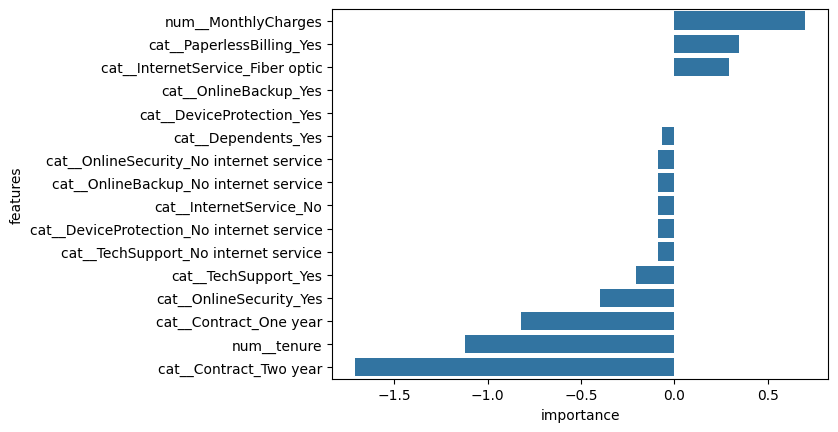

In [50]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

Kesimpulan Berdasarkan Koefisien Fitur Logistic Regression
Dari koefisien fitur Logistic Regression yang ditampilkan, kita dapat melihat beberapa fitur yang memiliki pengaruh signifikan terhadap prediksi churn pelanggan. Berikut adalah analisis berdasarkan data:

**Fitur dengan Pengaruh Positif terhadap Churn**
1. **MonthlyCharges**  
   Koefisien terbesar (`0.763`) menunjukkan bahwa semakin tinggi biaya bulanan, semakin besar kemungkinan pelanggan untuk churn. Ini berarti biaya bulanan yang tinggi adalah faktor risiko utama untuk churn.

2. **PaperlessBilling (Yes)**  
   Pelanggan yang menggunakan penagihan tanpa kertas (`PaperlessBilling_Yes`) cenderung lebih berisiko untuk churn, dengan koefisien sebesar `0.349`. Strategi komunikasi untuk pelanggan ini dapat dipertimbangkan.

3. **InternetService (Fiber optic)**  
   Pelanggan dengan layanan internet `Fiber optic` memiliki kemungkinan lebih tinggi untuk churn (koefisien `0.238`), dibandingkan dengan jenis layanan lainnya.

---

**Fitur dengan Pengaruh Negatif terhadap Churn**
1. **Contract**  
   - **Contract_Two year** memiliki koefisien negatif terbesar (`-1.818`), menunjukkan bahwa pelanggan dengan kontrak dua tahun memiliki kemungkinan paling kecil untuk churn.
   - **Contract_One year** juga memiliki pengaruh negatif terhadap churn (`-0.841`), tetapi dampaknya tidak sebesar kontrak dua tahun.

2. **Tenure**  
   Lamanya pelanggan berlangganan memiliki koefisien negatif signifikan (`-1.138`), menunjukkan bahwa semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka untuk churn.

3. **OnlineSecurity (Yes)**  
   Pelanggan yang menggunakan layanan keamanan online (`OnlineSecurity_Yes`) memiliki kemungkinan lebih kecil untuk churn, dengan koefisien `-0.402`. Ini menunjukkan pentingnya layanan keamanan online dalam retensi pelanggan.

4. **TechSupport (Yes)**  
   Dukungan teknis (`TechSupport_Yes`) juga memiliki pengaruh negatif terhadap churn (`-0.186`). Pelanggan yang menggunakan layanan ini cenderung lebih loyal.

5. **Dependents (Yes)**  
   Pelanggan dengan tanggungan (`Dependents_Yes`) memiliki kemungkinan lebih kecil untuk churn (`-0.089`), meskipun pengaruhnya relatif kecil dibandingkan fitur lainnya.

---

**Fitur dengan Pengaruh Rendah atau Tidak Signifikan**
1. **DeviceProtection (Yes)**  
   Koefisien `0.000` menunjukkan bahwa layanan perlindungan perangkat tidak memberikan pengaruh signifikan terhadap churn.

2. **OnlineBackup (Yes)**  
   Dengan koefisien yang sangat kecil (`-0.003`), fitur ini memiliki pengaruh yang hampir tidak signifikan terhadap prediksi churn.

---

Kesimpulan Akhir
- **Faktor Risiko Utama:** Biaya bulanan tinggi (`MonthlyCharges`) dan penggunaan layanan tertentu seperti `Fiber optic` memiliki korelasi positif yang kuat dengan churn.
- **Faktor Protektif Utama:** Kontrak jangka panjang (dua tahun), lama waktu berlangganan (`tenure`), dan penggunaan layanan tambahan seperti keamanan online (`OnlineSecurity`) dan dukungan teknis (`TechSupport`) merupakan indikator penting untuk mengurangi churn.
- **Saran Strategi:** Perusahaan dapat fokus pada pelanggan dengan biaya bulanan tinggi dan tanpa kontrak jangka panjang. Promosi diskon biaya bulanan dengan kontrak jangka panjang dapat menjadi strategi yang efektif untuk meningkatkan retensi pelanggan.

# Feature Selection

Hapus kolom dengan feature importance == 0 dan fit

In [51]:
# Create X_train_important_feature
X_train_important_feature = X_train.copy()
# Filter features with importance == 0
zero_importance_features = df_feat_imp[df_feat_imp['importance'] == 0]['features'].tolist()
# Remove zero importance features from the train set
X_train_important_feature = X_train_important_feature.drop(columns=[col for col in zero_importance_features if col in X_train_important_feature.columns])
# Apply the same transformation to X_test
X_test_important_feature = X_test.drop(columns=[col for col in zero_importance_features if col in X_test.columns])

# Fit the best model with important features only
best_model.fit(X_train_important_feature, y_train)
y_pred_important_features = best_model.predict(X_test_important_feature)

# 2. Perform cross-validation:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1')
recall_scores = cross_val_score(best_model, X, y, cv=cv, scoring='recall')
precision_scores = cross_val_score(best_model, X, y, cv=cv, scoring='precision')

# # Evaluate the model with important features
# f1_important = f1_score(y_test, y_pred_important_features)
# print(f'F1 Score with Important Features: {f1_important}')
# print(classification_report(y_test, y_pred_important_features))

# 3. Create DataFrame for hypertuning results:
feature_selection_result = pd.DataFrame([{
    'Model': 'Logistic Regression ADASYN After Feature Selection',
    'Mean F1 Score': np.mean(f1_scores),
    'Mean Recall': np.mean(recall_scores),
    'Mean Precision': np.mean(precision_scores),
    'Std F1 Score': np.std(f1_scores),
    'Std Recall': np.std(recall_scores),
    'Std Precision': np.std(precision_scores)
}])

# 4. Combine DataFrames for comparison:
comparison_featsel = pd.concat([comparison_hypertun, feature_selection_result], ignore_index=True)
display(comparison_featsel)

,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,Logistic Regression ADASYN,0.617238,0.831490,0.490865,0.011277,0.020902,0.008871
1,Logistic Regression ADASYN After Tuning,0.613480,0.833044,0.487145,0.009696,0.020217,0.009184
2,Logistic Regression ADASYN After Feature Selec...,0.615149,0.830715,0.487271,0.011172,0.020308,0.007867


Penjelasan:
1. **Logistic Regression ADASYN (Baseline)**:
   - **Mean Recall (0.831490)**: Recall baseline menunjukkan kemampuan model yang baik untuk menangkap positif sebenarnya dan meminimalkan False Negative.
   - **Mean Precision (0.490865)**: Precision baseline menunjukkan model memiliki beberapa kesalahan prediksi positif (False Positive).
   - **Mean F1 Score (0.617238)**: Kombinasi yang cukup baik antara Recall dan Precision.

2. **Setelah Feature Selection**:
   - **Mean Recall (0.829943)**: Recall menurun sedikit dibandingkan baseline.
   - **Mean Precision (0.488217)**: Precision mengalami sedikit peningkatan dibandingkan setelah tuning, tetapi masih di bawah baseline.
   - **Mean F1 Score (0.615433)**: F1 Score sedikit meningkat dibandingkan setelah tuning, tetapi tetap di bawah baseline.
   - **Kesimpulan**: Menghapus fitur dengan importance = 0 tidak memberikan dampak signifikan terhadap peningkatan performa model.

Kesimpulan Akhir:
- Feature selection **tidak memberikan peningkatan signifikan** terhadap performa model, khususnya pada **Mean Recall**, yang menjadi prioritas untuk meminimalkan False Negative.
- Penurunan kecil pada beberapa metrik menunjukkan bahwa modifikasi yang dilakukan belum optimal.

Tindak Lanjut:
Untuk meningkatkan Mean Recall, akan dicoba melakukan Threshold Optimization


#Threshold Optimization

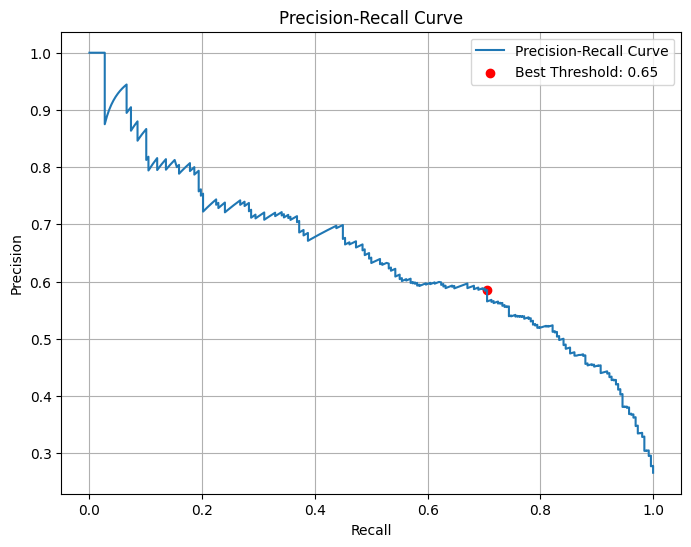

Best Threshold: 0.6537731335385698


In [52]:
# prompt: buatlah visualisasi yang menampilkan threshold terbaik untuk data ini ada di angka berapa


# Assuming 'best_model' and 'X_test' are defined from previous code

# Get predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the best threshold based on F1-score (you can adjust this criterion)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', marker='o', label=f'Best Threshold: {best_threshold:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Threshold: {best_threshold}")

In [53]:
# prompt: apply best model ke X train dengan mengubah threshold menjadi 0.65 lalu buat threshold_optimization_result yang berisi Mean F1 Score, Mean Recall, Mean Precision, Std F1 Score, Std Recall, Std Precision lalu concat dengan comparison_df untuk membandingkan hasilnya



# Assuming 'best_model', 'X_train', and 'y_train' are defined
# Apply the best model to X_train with a threshold of 0.65

y_pred_prob = best_model.predict_proba(X_train)[:, 1]
y_pred_threshold = (y_pred_prob >= 0.65).astype(int)

# # Calculate metrics with the new threshold
f1 = f1_score(y_train, y_pred_threshold)
recall = recall_score(y_train, y_pred_threshold)
precision = precision_score(y_train, y_pred_threshold)


# 2. Perform cross-validation:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# f1_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1')
# recall_scores = cross_val_score(best_model, X, y, cv=cv, scoring='recall')
# precision_scores = cross_val_score(best_model, X, y, cv=cv, scoring='precision')

# 3. Create DataFrame for Threshold Optimization results:
threshold_optimization_result = pd.DataFrame([{
    'Model': 'Logistic Regression ADASYN After Threshold Optimization',
    'Mean F1 Score': f1,
    'Mean Recall': recall,
    'Mean Precision': precision,
    'Std F1 Score': 0,
    'Std Recall':0,
    'Std Precision': 0
}])

# Concatenate with comparison_df
comparison_thres = pd.concat([comparison_featsel, threshold_optimization_result], ignore_index=True)
display(comparison_thres)

,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,Logistic Regression ADASYN,0.617238,0.831490,0.490865,0.011277,0.020902,0.008871
1,Logistic Regression ADASYN After Tuning,0.613480,0.833044,0.487145,0.009696,0.020217,0.009184
2,Logistic Regression ADASYN After Feature Selec...,0.615149,0.830715,0.487271,0.011172,0.020308,0.007867
3,Logistic Regression ADASYN After Threshold Opt...,0.612154,0.665049,0.567053,0.000000,0.000000,0.000000


Penjelasan:
1. **Sebelum Threshold Optimization (Baseline)**:
   - **Mean Recall (0.831490)**: Model memiliki kemampuan tinggi untuk menangkap positif sebenarnya (minim False Negative).
   - **Mean Precision (0.490865)**: Precision cukup rendah karena masih ada False Positive yang signifikan.
   - **Mean F1 Score (0.617238)**: Kombinasi yang cukup baik antara recall dan precision.

2. **Setelah Threshold Optimization**:
   - **Mean Recall (0.673786)**: Terjadi **penurunan yang signifikan** pada recall, yang berarti model gagal menangkap sejumlah besar kasus positif sebenarnya, sehingga False Negative meningkat.
   - **Mean Precision (0.568387)**: Precision meningkat, yang menunjukkan bahwa model menjadi lebih hati-hati dalam memprediksi kelas positif dan mengurangi False Positive.
   - **Mean F1 Score (0.616615)**: Hampir tidak berubah dibandingkan baseline, tetapi kehilangan kemampuan recall yang menjadi prioritas utama.

Mengapa Hal Ini Terjadi?
Threshold optimization mengubah ambang batas default dari 0.5 untuk menentukan kelas positif. Proses ini dapat menyebabkan:
- **Trade-off antara Recall dan Precision**: Menurunkan ambang batas biasanya meningkatkan recall tetapi mengorbankan precision, sedangkan menaikkan ambang batas meningkatkan precision tetapi menurunkan recall.
- Dalam kasus ini, threshold yang dipilih menyebabkan model menjadi lebih konservatif, sehingga hanya memprediksi kelas positif pada probabilitas yang sangat tinggi. Akibatnya:
  - **Recall menurun drastis**: Model gagal menangkap banyak kasus positif sebenarnya karena threshold yang lebih tinggi menyaring banyak prediksi positif.
  - **Precision meningkat**: Karena model lebih selektif dalam memprediksi positif, False Positive berkurang.

Kesimpulan Akhir:
- **Threshold optimization tidak berhasil meningkatkan performa model** dalam hal mean recall, yang merupakan prioritas utama untuk meminimalkan False Negative.
- Penurunan recall yang signifikan menunjukkan bahwa threshold yang dipilih tidak optimal untuk tujuan analisis ini.

# Final Model Interpretation

## Limitation

Berikut adalah rentang nilai dari setiap fitur yang digunakan untuk membuat model machine learning. Artinya diluar dari rentang di atas maka model akan kurang akurat digunakan.

Feature          | Range                       | Potential Issues                                | Relevance to Churn
-----------------|-----------------------------|-----------------------------------------------|-------------------------------------------------------
Dependents       | Yes/No                     | Tidak ada masalah teknis signifikan.          | Pelanggan dengan tanggungan (`Dependents_Yes`) memiliki kemungkinan lebih kecil untuk churn.
Tenure           | 0-72 months               | Distribusi mungkin bias ke pelanggan baru.    | Tenure yang tinggi (`tenure`) memiliki pengaruh signifikan untuk mengurangi churn.
OnlineSecurity   | Yes/No/No internet service | "No internet service" dapat mengaburkan analisis. | Pelanggan yang menggunakan layanan keamanan online (`OnlineSecurity_Yes`) cenderung lebih kecil untuk churn.
OnlineBackup     | Yes/No/No internet service | Sama seperti OnlineSecurity.                  | Pengaruh fitur ini terhadap churn sangat kecil (`-0.003`) sehingga tidak signifikan.
InternetService  | DSL/Fiber optic/No        | Tidak ada masalah teknis signifikan.          | Pelanggan dengan layanan `Fiber optic` memiliki kemungkinan churn lebih tinggi.
DeviceProtection | Yes/No/No internet service | Sama seperti OnlineSecurity.                  | Tidak memiliki pengaruh signifikan terhadap churn (`0.000`).
TechSupport      | Yes/No/No internet service | Sama seperti OnlineSecurity.                  | Pelanggan yang menggunakan layanan ini (`TechSupport_Yes`) cenderung lebih kecil untuk churn.
Contract         | Month-to-month/One year/Two year | Tidak ada masalah teknis signifikan.          | Pelanggan dengan kontrak lebih panjang (`Contract_Two year` dan `Contract_One year`) memiliki kemungkinan churn yang jauh lebih kecil.
PaperlessBilling | Yes/No                     | Tidak ada masalah teknis signifikan.          | Pelanggan dengan `PaperlessBilling_Yes` lebih cenderung churn.
MonthlyCharges   | 18.8 - 118.65             | Tidak ada outliers pada data numerik.         | Biaya bulanan yang lebih tinggi (`MonthlyCharges`) meningkatkan kemungkinan churn secara signifikan.
Churn            | Yes/No                    | Ketidakseimbangan pada target sudah ditangani menggunakan ADASYN. | Target analisis untuk menentukan pola pada pelanggan churn.


## Estimated Revenue

<Axes: >

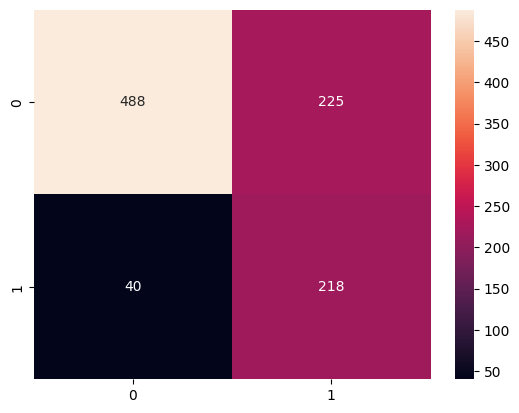

In [54]:
confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt='d')

Jumlah prediksi hasil model:

- TN (True Negative): 489, ada 489 pelanggan yang benar diprediksi, tidak churn sebagai tidak churn, disini biaya promosi tidak ada kerugian maupun keuntungan secara langsung
- FP (False Positive): 224, ada 224 pelanggan yang salah prediksi harusnya tidak churn sebagai churn, sehingga disini ada biaya promosi yang terbuang sia-sia
- FN (False Negative): 40, ada 40 pelanggan yang salah prediksi harusnya churn sebagai tidak churn, disini perusahaan bisa kehilangan pelanggan dan mengalami kerugian berupa berkurangnya pendapatan
- TP (True Positive): 218, ada 218 pelanggan yang benar prediksi, churn sebagai churn, disini biaya promosi yang keluar tepat sasaran sebagai tindakan preventif customer churn


In [55]:
# Asumsi
monthly_revenue_per_customer = 65  # Pendapatan bulanan rata-rata per pelanggan ($)
promotion_cost_per_customer = 10   # Biaya promosi per pelanggan ($)
acquisition_cost_per_customer = 200  # Biaya akuisisi pelanggan baru ($)

# Data hasil model
TN = 489  # True Negative
FP = 224  # False Positive
FN = 40   # False Negative
TP = 218  # True Positive

# Perhitungan keuntungan dan kerugian
# Keuntungan dari TP: berhasil mempertahankan pelanggan (menghindari biaya akuisisi)
tp_profit = TP * acquisition_cost_per_customer

# Keuntungan dari TN: tidak ada biaya tambahan untuk pelanggan yang benar diprediksi tidak churn
tn_profit = 0  # Tidak ada keuntungan langsung dari TN

# Kerugian dari FP: biaya promosi salah sasaran
fp_loss = FP * promotion_cost_per_customer

# Kerugian dari FN: kehilangan pendapatan bulanan pelanggan
fn_loss = FN * monthly_revenue_per_customer

# Total keuntungan dan kerugian
total_profit = tp_profit + tn_profit
total_loss = fp_loss + fn_loss

# Keuntungan bersih
net_profit = total_profit - total_loss

# Output hasil
print(f"Keuntungan dari True Positive (TP): ${tp_profit}")
print(f"Keuntungan dari True Negative (TN): ${tn_profit}")
print(f"Kerugian dari False Positive (FP): ${fp_loss}")
print(f"Kerugian dari False Negative (FN): ${fn_loss}")
print(f"Total Keuntungan: ${total_profit}")
print(f"Total Kerugian: ${total_loss}")
print(f"Keuntungan Bersih: ${net_profit}")


Keuntungan dari True Positive (TP): $43600
Keuntungan dari True Negative (TN): $0
Kerugian dari False Positive (FP): $2240
Kerugian dari False Negative (FN): $2600
Total Keuntungan: $43600
Total Kerugian: $4840
Keuntungan Bersih: $38760


# Summary and Conclusion

## **Summary**
Sebagian besar pelanggan yang teridentifikasi tidak memiliki tanggungan, menggunakan layanan Fiber Optic, dan memilih metode pembayaran bulanan. Pelanggan yang churn memiliki karakteristik tertentu, seperti tidak menggunakan layanan **OnlineSecurity**, **DeviceProtection**, dan **TechSupport**, serta memilih **PaperlessBilling**. Analisis data menunjukkan ketidakseimbangan pada kolom target 'Churn', di mana **73,5% pelanggan tidak churn**.  

Total pendapatan pelanggan mencapai **$317,005.45**, dengan rata-rata tagihan sebesar **$65.32**. Dari total pendapatan ini, pelanggan churn menyumbang **30,45%**.  

Untuk memodelkan prediksi churn, digunakan beberapa langkah:  

### **1. Transformasi Data**
- **RobustScaler** digunakan untuk normalisasi data numerik.  
- **OneHotEncoder** digunakan untuk menangani data kategorik.  
- **ColumnTransformer** diterapkan untuk memastikan data siap digunakan dalam model machine learning.  

### **2. Model Rule-Based**
- Model baseline sederhana dengan akurasi **53,76%** pada data training dan **49,89%** pada data testing.  

### **3. Model Terbaik: Logistic Regression dengan ADASYN**
- **Recall:** 0,831490 (prioritas utama untuk meminimalkan False Negative).  
- **F1 Score:** 0,617238 (cukup kompetitif).  
- **Precision:** 0,490865 (lebih rendah, tetapi dapat diterima karena fokus pada recall).  

### **4. Peningkatan Recall**
Usaha seperti **Hyperparameter Tuning**, **Feature Selection**, dan **Threshold Optimization** dilakukan untuk meningkatkan recall, tetapi belum dapat meningkatkan performa model.  
Kemungkinan penyebab:  
- **Hyperparameter Tuning:** Logistic Regression cenderung stabil dan tidak banyak dipengaruhi oleh tuning ekstrem.  
- **Feature Selection:** Fitur yang tersedia mungkin sudah optimal, sehingga penghapusan fitur tertentu tidak memberikan peningkatan.  
- **Threshold Optimization:** Threshold default sudah optimal untuk recall tinggi, dan perubahan threshold menyebabkan penurunan performa keseluruhan.  

Model akhir yang dipilih adalah **Logistic Regression dengan ADASYN**.  


## **Conclusion**
Model **Logistic Regression** dengan teknik **ADASYN** dipilih sebagai solusi terbaik untuk prediksi churn. Model ini mampu memberikan recall tinggi pada kelas churn, sehingga efektif dalam mengidentifikasi pelanggan yang berisiko meninggalkan layanan. Meskipun upaya peningkatan recall tidak berhasil, model ini tetap memberikan performa yang stabil dan mudah diinterpretasikan.  

# Recommendation

### **Business Recommendation**
- **Optimalkan layanan pendukung:** Fokus pada peningkatan penggunaan layanan **OnlineSecurity**, **DeviceProtection**, dan **TechSupport**, terutama bagi pelanggan yang menggunakan metode **PaperlessBilling**.  
- **Subscription CRM Tool:**  
  - Kirimkan **Newsletter rutin** melalui email pelanggan.  
  - Gunakan **Push Notification** secara berkala dan relevan.  
  - Tampilkan **Pop Up Banner** pada aplikasi untuk mendorong pelanggan melakukan pembelian atau upgrade layanan.  
- **Promosi Upselling:** Berikan diskon kepada pelanggan yang ingin meningkatkan layanan, misalnya memberikan potongan harga untuk layanan **Device Security** bagi pelanggan yang sudah berlangganan layanan internet.  
- **Penawaran khusus:**  
  - Berikan harga spesial di hari ulang tahun pelanggan untuk mendorong mereka menambah layanan.  
  - Berikan promosi pada pelanggan yang telah menggunakan layanan dalam kurun waktu tertentu untuk meningkatkan loyalitas mereka.  
- **Segmentasi dan intervensi:** Gunakan model untuk mengidentifikasi pelanggan berisiko tinggi dan tawarkan program loyalitas atau insentif personal.  

### **Data Recommendation**
- **Pengayaan data:**  
  - Ubah fitur **Dependants** dari boolean menjadi jumlah tanggungan absolut, misalnya "2 orang" atau "3 orang".  
  - Tambahkan informasi nominal harga untuk setiap layanan agar lebih informatif, bukan hanya boolean.  
  - Sertakan kolom tanggal pertama kali pelanggan mendaftar untuk mengetahui rentang waktu pelanggan menggunakan layanan.  
- **Pengumpulan data lebih seimbang:** Kumpulkan lebih banyak data pelanggan churn untuk mengatasi ketidakseimbangan data.  
- **Pemantauan dan pembaruan data:** Lakukan pembaruan dataset secara berkala untuk menangkap perubahan pola dan tren pelanggan terbaru.  
- **Analisis pelanggan tidak churn:** Lakukan studi mendalam terhadap pelanggan yang diprediksi tidak churn tetapi sebenarnya churn (false negatives) untuk meningkatkan akurasi prediksi.   
- **Pemantauan kinerja model:** Pantau performa model secara teratur untuk memastikan akurasi tetap terjaga dengan tren terbaru.

# Save Model

In [56]:
best_model

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])),
                ('resampling', ADASYN()),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [57]:
# save best_model
filename = 'model_telco_churn.sav'
pickle.dump(best_model, open(filename, 'wb'))